# 1. 단변량 시계열 분석

## 1) 안정적 시계열 분석

### (1) 자기 회귀 모델 (AR, AutoRegressive Model)

- 과거 자신의 값들을 독립변수로 삼아 현재 값을 예측하는 회귀
- 시계열 데이터의 '자기 상관성' 활용

$$
AR(p):  y_{t}=c +\phi _1y_{t-1}+\phi_2y_{t-2}+...+\phi _py_{t-p}+\varepsilon _t
$$

- 과거 p개 시점의 데이터의 선형 조합을 이용해 예측하는 모델
- 선형 회귀식에서 x가 들어갈 자리에 예측할 값의 과거 값들이 들어감

### (2) 이동 평균 모델 (MA)

- 과거 시점의 잔차를 독립변수로 삼아 현재 값을 예측하는 모델
- 과거의 잘못 예측한 것을 현재 시점에 반영
- 잔차들은 모두 백색잡음 & 서로 독립적

$$
MA(q): y_t = \mu +\varepsilon _t+ \theta _1\varepsilon_{t-1}+\theta_2\varepsilon_{t-2}+...+\theta_q\varepsilon_{t-q}
$$

- 과거 q개의 예측 오차의 선형 결합으로 예측하는 모델
- 선형 회귀식에서 x가 들어갈 자리에 예측할 값으 ㅣ과거 오차들이 들어감

#### (3) AR, MA 모델의 전제 조건

#### 정상성
- AR모형
    - 특성 방정식: $1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p = 0$
    -  모든 해의 절댓값 > 1
- MA 모형
    - 잔차들은 정상성 이미 만족 (=백색잡음)
    - 잔차들의 조합으로 이뤄진 MA 모형도 항상 정상성 만족!

#### 가역성
- MA 모형을 AR 형태로 재표현할 수 있는지 여부
- AR 모형
    - 처음부터 AR 형태로 표현되어 있기 때문에 가영성 체크 X
- MA 모형
    - 특성 방정식: $1 + \theta_1 z + \cdots + \theta_q z^q = 0$
    - 모든 해의 절댓값 > 1

### (4) ARMA 

- AR(p) 모형과 MA(q) 모형을 결합한 모형
- 과거 p 개의 관측값 + 과거 q 개의 오차를 활용해 예측
- AR 모형의 정상성 + MA 모형의 가역성 모두 만족 필요

### (5) 차수 결정 방법: 자기 상관 함수

#### 자기 상관 계수 (Auto Correlation Function, ACF)
- ARMA(p,q) 모형에서 사용할 q개의 오차 결정 방법
- 두 시점 사이의 상관관계 파악 (간접 영향까지 모두 파악)

#### 부분 자기 상관 계수 (Partial Autocorrelation Function, PACF)
- ARMA(p,q) 모형에서 사용할 p개의 시점 결정 방법
- 두 시점 사이의 직접적인 영향 파악


|  | **ACF 그래프** 모습 | **PACF 그래프** 모습 |
| --- | --- | --- |
| **AR(p) (= ARMA(p, 0))사용**해야 할 때 | 천천히 감소 or 진동 감소 | p+1 시점부터 0에 근접 |
| **MA(q) (= ARMA(0, q))사용**해야 할 때 | q+1 시점부터 0에 근접 | 천천히 감소 or 진동 감소 |
| **ARMA(p, q) 사용**해야 할 때 | q+1 시점부터 0에 근접 | p+1 시점부터 0에 근접 |

## 2) 불안정 시계열

1. 비정상 시계열 데이터
2. 정상성 확보
3. ARMA를 사용해 안정적 시계열 분석

-> 안정적 시계열 모델에 정상성 확보 과정(차분, 계절성 차분)이 추가된 형태

### (1) ARIMA

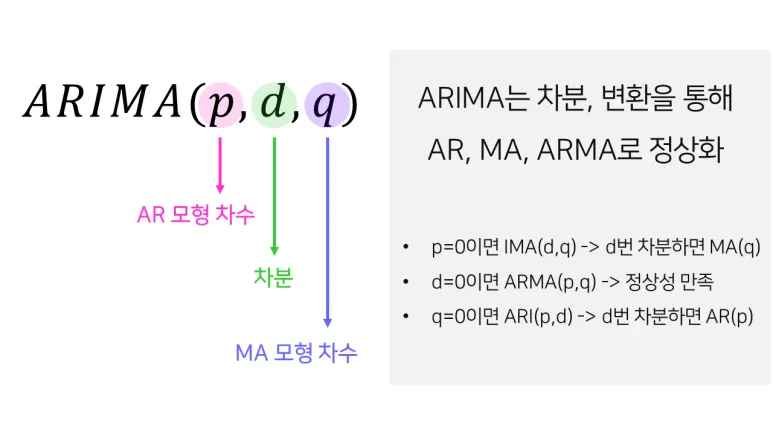

$$
ARMA(p, q) + \text{차분} \rightarrow ARIMA(p,d,q)
$$

- p = AR 모형 차수
- d = 차분
- q = MA 모형 차수

### (2) SARIMA

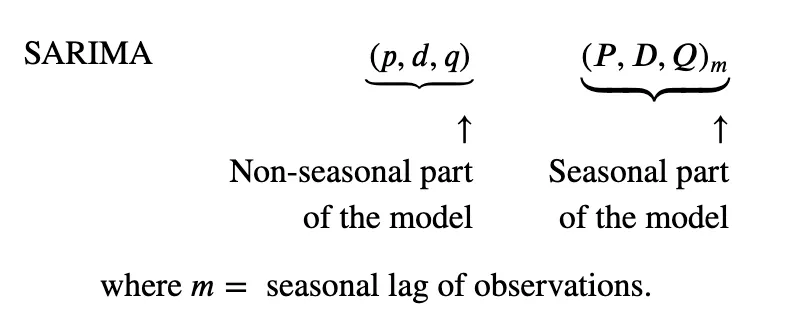

- 시계열 데이터의 계절성을 처리할 수 있는 모델
- ARIMA 모델에 계절성 변동을 반영한 모델

- **하이퍼파라미터**
    - $(p, d, q)$: 비계절 ARIMA 파라미터
        - $p$ → AR의 차수
        - $d$ → 차분의 정도
        - $q$ → MA의 차수
    - $(P, D, Q)$: 계절 ARIMA 파라미터
        - $P$ → 계절성 AR의 차수
        - $D$ → 계절성 차분의 정도
        - $Q$ → 계절성 MA의 차수
    - $m$: 계절성 주기의 길이
        - 예시) 12(개월), 7(일), 4(개월) ..

#### 불안정 시계열에서의 하이퍼파라미터 결정 방법
- ACF, PACF 그래프의 경우, 시각적으로 살펴보기 위한 도구일 뿐

1. d, D (차분, 계절 차분) 결정
    - ADF로 정상성 확보 여부 판단 후 결정
    - 데이터가 정상성을 갖출 때 -> d, D (차분 정도) 결정
    - 차분 정도는 대부분 0 or 1에서 결정됨
2. p, q (AR, MA 차수) 결정
    - ACF, PACF 범위를 추정
    - AIC, BIC같은 정보 기준으로 그리드 서치 후, 최종 선택

# 2. 다변량 시계열 분석

## 1) VAR (Vector Autoregression)

- 자신의 과거 값과 다른 변수들의 과거 값을 함께 사용해 미래를 예측하는 모델

$$
X_t = a_{11} X_{t-1} + a_{12} Y_{t-1} + ε_{x,t}
$$

$$
Y_t = a_{21} X_{t-1} + a_{22} Y_{t-1} + ε_{y,t}
$$

-> X와 T가 서로의 과거를 함께 사용

#### 적합한 경우
- 여러 경제 지표가 서료 영향을 주고받는 경우
- 금융 시장에서 여러 자산 가격이 상호작용하는 경우
- 변수 간 상호의존성이 중요한 경우

#### 부적합한 경우
- 변수가 너무 많은 경우
- 변수 간 관계가 명확하지 않은 경우
- 장기 예측이 필요한 경우

#### VAR 모델을 활용한 분석 방법
1. 충격 반응 함수 (IRF, Impulse-Response Function)
- 한 시계열에 특정 시점에 충격이 발생할 때, 다른 시계열에 시간에 따라 어떤 영향을 주는지 분석
2. 예측오차 분산 분해
- 어떤 시계열이 상대적으로 어떤 영향을 끼치고 있는지 중요도를 산출하기 위해서 진행

#### VAR 모델 장점
- 변수 간 양방향 영향 분석 가능 
- 도메인 지식 없어도 여러 변수를 함께 예측
- 동시성 문제 없음

#### VAR 모델 단점 
- 변수가 많으면 파라미터 폭발
- 장기적 관계 정보 손실 가능
- 상관관계 != 인과관계 

# 3. 딥러닝을 활용한 시계열 분석

#### 전통 통계 모델의 한계
- 데이터가 많으면 처리 속도가 느려짐
- 크기가 고정된 데이터만 가능
- 비선형 패턴 포착이 어려움

## 1) RNN 계열

### RNN
- 이전 시점의 정보를 현재로 전달하는 순환 구조의 기본 신경망

적합
- 짧은 ~ 중간 길이의 시계열 (10~100 시점)
- 순차적 의존성이 강한 데이터 (주가, 센서 데이터)
- 자기상관이 큰 데이터

부적합
- 매우 긴 시계열 (장기 의존성 문제)
- 병렬 처리가 필요한 대규모 데이터

### LSTM (Long Short Term Memory)
- 게이트 메커니즘으로 장기 기억을 유지할 수 있도록 개선한 RNN

적합
- 장기 의존성이 중요한 경우
- 중요한 과거 이벤트가 먼 미래에 영향을 주는 경우

### GRU (Gated Recurrent Unit)
- LSTM을 단순화해 더 빠르게 학습하면서도 비슷한 성능을 내는 모델

적합
- LSTM처럼 장기 의존성이 필요하지만, 학습 속도가 중요한 경우
- 데이터가 상대적으로 적을 때
- 실시간 처리가 필요한 경우

| 모델 | 장점 | 단점 | 사용 예시 |
| --- | --- | --- | --- |
| **RNN** | 간단, 빠름 | 장기 의존성 학습 불가 | 짧은 시계열 (일주일 주가) |
| **LSTM** | 장기 의존성 학습 가능 | 복잡, 느림 | 분기별 재무제표 예측 |
| **GRU** | LSTM보다 빠름, 적당한 성능 | LSTM보다 장기 의존성 약함 | 실시간 센서 데이터 예측 |

## 2) Transformer 계열

- 어텐션 메커니즘으로 모든 시점을 동시에 참조해 병렬 처리하는 모델

#### 적합
- 매우 긴 시계열
- 전역 패턴이 중요한 경우
- 대규모 데이터
- 다변량 시계열

#### 부적합
- 짧은 시계열
- 계산 자원이 제한된 경우


| 모델 | 언제 사용? | 사용 예시 | 장점 | 단점 |
| --- | --- | --- | --- | --- |
| **Vanilla Transformer** | 짧은 시계열 | 30일 주가 예측 | 구조 단순 | 긴 시계열 처리 어려움 |
| **Informer** | 긴 시계열 | 전력 수요 예측 | 계산 효율적 | 짧은 시계열 과적합 |
| **Autoformer** | 주기성 뚜렷 | 월별 판매량 예측 | 주기 포착 우수 | 구조 복잡 |
| **TFT** | 외생 변수 많음 | 유통 수요 예측 | 해석 가능 | 학습 시간 오래 걸림 |

## 3) Foundation Model

- 거대한 데이터로 사전학습해 다양한 문제를 해결할 수 있는 범용 모델

#### 특징
- 특정 문제 적용 X
- 범용적
- 사전 학습 후 Fine-tuning으로 특화

### LLM 기반 모델
- 대규모 언어 모델의 패턴 인식 능력을 시계열에 활용하는 접근법
- Without Adadptation
    - LLM이 이미 시계열 지식을 가지고 있다고 가정
    - 프롬프트 엔지니어링에 집중
- Adapt LLM
    - LLM을 시계열 데이터로 Fine-tuning
    - 일부 레이어만 학습 or 전체 Fine-tuning
- Adapt to LLM
    - 시계열을 텍스트로 변환 후 LLM 활용

### 자체 거대 모델
- 대규모 시계열 데이터로 사전 학습해, 다양한 예측 문제에 범용적 적용 가능한 모델

## 4) 딥러닝 모델 선택 가이드

### 핵심 트레이드오프
- **단순함 vs 성능**: RNN < LSTM/GRU < Transformer
- **해석 가능 vs 정확도**: 통계 모델 > 딥러닝 (단, TFT는 어텐션으로 해석 가능)
- **학습 시간 vs 예측 성능**: 간단한 모델은 빠르고, 복잡한 모델은 정확함
- **데이터 크기**: 적으면 통계 모델/RNN, 많으면 Transformer

### 상황별 추천 모델
| 상황 | 추천 모델 | 이유 |
| --- | --- | --- |
| 짧은 시계열 (< 100) | 통계 모델, RNN | 데이터가 적으면 단순한 모델이 과적합 방지에 유리 |
| 중간 길이 (100~1000) | LSTM, GRU | 장기 의존성 학습 가능, 적절한 복잡도 |
| 매우 긴 시계열 (1000+) | Informer, Autoformer | 긴 시퀀스의 전역 패턴 효율적 학습 |
| 장기 의존성 중요 | LSTM, Transformer | GRU보다 먼 과거 정보 유지에 강함 |
| 주기 패턴 뚜렷 | Autoformer | 추세/계절성 분해로 주기 포착 우수 |
| 외생 변수 많음 | TFT | 정적/동적 변수 융합 + 해석 가능 |
| 대규모 데이터 | Transformer 계열 | 병렬 연산으로 학습 효율적 |
| 범용 예측 필요 | Foundation Model | 사전 학습된 지식으로 빠른 적용 |

### 참고 사항
- 데이터가 적을 때는 딥러닝보다 **통계 모델(ARIMA 등)**이 더 효과적일 수 있음
- GRU는 LSTM보다 빠르지만, **장기 의존성 학습은 LSTM이 우세**
- **해석이 중요한 비즈니스 문제**에는 **TFT** 고려